In [1]:
%matplotlib inline
import sys
sys.path.append("../") # go to parent dir

import random
from dataset import PixelSetData
from utils import label_utils
from collections import Counter, defaultdict
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm

In [6]:
# add variance?

data = [
['ema_decay', 0.9, 0.4601045349035316],
['ema_decay', 0.9, 0.32139510759800405],
['ema_decay', 0.9, 0.5194565104822798],
['ema_decay', 0.99, 0.5139436555233388],
['ema_decay', 0.99, 0.5581891214392634],
['ema_decay', 0.99, 0.5046688994446562],
['ema_decay', 0.999, 0.5408465005749824],
['ema_decay', 0.999, 0.5762076362531322],
['ema_decay', 0.999, 0.529779436009155],
['ema_decay', 0.9999, 0.5601762618781354],
['ema_decay', 0.9999, 0.5946490781112892],
['ema_decay', 0.9999, 0.568214087901972],
['ema_decay', 1.0, 0.5366869010864938],
['ema_decay', 1.0, 0.5377891023490304],
['ema_decay', 1.0, 0.5087135282510687],
    
['threshold', 0.5, 0.551290806041669],
['threshold', 0.5, 0.5578027463535473],
['threshold', 0.5, 0.5253772786395654],
['threshold', 0.7, 0.5518466785821933],
['threshold', 0.7, 0.561043684111749],
['threshold', 0.7, 0.5287371535598768],
['threshold', 0.8, 0.5474276036835136],
['threshold', 0.8, 0.5800341780393936],
['threshold', 0.8, 0.5368073083890428],
['threshold', 0.9, 0.5601762618781354],
['threshold', 0.9, 0.5946490781112892],
['threshold', 0.9, 0.568214087901972],
['threshold', 0.95, 0.49917292617856734],
['threshold', 0.95, 0.47712525434053266],
['threshold', 0.95, 0.5523421265447026],

['tradeoff', 0.5, 0.5627676961519638],                                                                         
['tradeoff', 0.5, 0.5829430486662452],                                                                        
['tradeoff', 0.5, 0.557282510990248],                                                                         
['tradeoff', 1.0, 0.5546222570677087],
['tradeoff', 1.0, 0.5854429057781775],
['tradeoff', 1.0, 0.5647112051197634],
['tradeoff', 2.0, 0.5601762618781354],
['tradeoff', 2.0, 0.5946490781112892],
['tradeoff', 2.0, 0.568214087901972],
['tradeoff', 5.0, 0.5524974912714363],
['tradeoff', 5.0, 0.6074349142064911],
['tradeoff', 5.0, 0.5650819813536196],
['tradeoff', 10.0, 0.5378462027260281],     
['tradeoff', 10.0, 0.6082525840775063],    
['tradeoff', 10.0, 0.5450968352219483],     
    
    
#['sample_size', 10, 0.559690950872098],
#['sample_size', 10, 0.6020780682992941],
#['sample_size', 10, 0.5607597223236447],
#['sample_size', 50, 0.559690950872098],
#['sample_size', 50, 0.6020780682992941],
#['sample_size', 50, 0.5607597223236447],
#['sample_size', 100, 0.559690950872098],
#['sample_size', 100, 0.6020780682992941],
#['sample_size', 100, 0.5607597223236447],
#['sample_size', 200, 0.559690950872098],
#['sample_size', 200, 0.6020780682992941],
#['sample_size', 200, 0.5607597223236447],
]

# averages
#data = [
#    ('ema_decay', 0.9, 43.4, 66.6),
#    ('ema_decay', 0.99, 52.6, 87.8),
#    ('ema_decay', 0.999, 54.9, 89.4),
#    ('ema_decay', 0.9999, 57.4, 90.4),
#    ('ema_decay', 1.0, 52.8, 83.8),
#    # add 1.0 here
#
#    ('threshold', 0.5, 54.5, 84.2),
#    ('threshold', 0.7, 54.7, 85.1),
#    ('threshold', 0.8, 55.5, 86.7),
#    ('threshold', 0.9, 57.4, 90.4),
#    ('threshold', 0.95, 51.0, 86.7),
#
#    ('trade_off', 0.5, 56.8, 90.1),
#    ('trade_off', 1.0, 56.8, 90.3),
#    ('trade_off', 2.0, 57.4, 90.4),
#    ('trade_off', 5.0, 57.5, 90.3),
#    ('trade_off', 10.0, 56.4, 90.3),
#    
##    ('sample_size', 10, 57.4, 90.4),
##    ('sample_size', 50, 57.4, 90.4),
##    ('sample_size', 100, 57.4, 90.4),
##    ('sample_size', 200, 57.4, 90.4),
#]

In [7]:
#df = pd.DataFrame(data, columns=['parameter', 'value', 'f1', 'accuracy'])
df = pd.DataFrame(data, columns=['parameter', 'value', 'f1'])
df['f1'] = df['f1'] * 100.0
print(df)

    parameter    value         f1
0   ema_decay   0.9000  46.010453
1   ema_decay   0.9000  32.139511
2   ema_decay   0.9000  51.945651
3   ema_decay   0.9900  51.394366
4   ema_decay   0.9900  55.818912
5   ema_decay   0.9900  50.466890
6   ema_decay   0.9990  54.084650
7   ema_decay   0.9990  57.620764
8   ema_decay   0.9990  52.977944
9   ema_decay   0.9999  56.017626
10  ema_decay   0.9999  59.464908
11  ema_decay   0.9999  56.821409
12  ema_decay   1.0000  53.668690
13  ema_decay   1.0000  53.778910
14  ema_decay   1.0000  50.871353
15  threshold   0.5000  55.129081
16  threshold   0.5000  55.780275
17  threshold   0.5000  52.537728
18  threshold   0.7000  55.184668
19  threshold   0.7000  56.104368
20  threshold   0.7000  52.873715
21  threshold   0.8000  54.742760
22  threshold   0.8000  58.003418
23  threshold   0.8000  53.680731
24  threshold   0.9000  56.017626
25  threshold   0.9000  59.464908
26  threshold   0.9000  56.821409
27  threshold   0.9500  49.917293
28  threshold 

/home/jnyborg/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


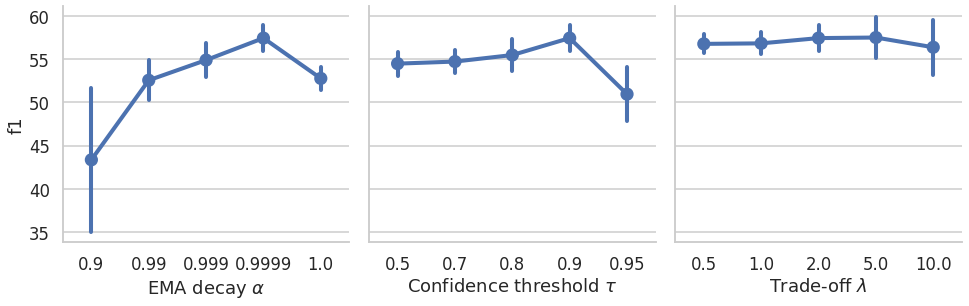

In [42]:
from matplotlib.ticker import FormatStrFormatter

sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('talk', rc={'text.usetex': True})


# Separate
#figsize = (5,5)
#
#plt.figure(figsize=figsize)
#g = sns.pointplot(data=df.query('parameter == "ema_decay"'), x='value', y='f1', marker='o')
#g.set_xlabel(r'EMA decay $\alpha$')
#g.set_ylim(30, 60)
#sns.despine()
##g.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#plt.tight_layout()
#plt.savefig('sensitivity_ema.pdf')
#plt.show()
#
#plt.figure(figsize=figsize)
#g = sns.pointplot(data=df.query('parameter == "threshold"'), x='value', y='f1', marker='o')
#g.set_xlabel(r'Threshold $\epsilon$')
#g.set_ylim(30, 60)
#g.yaxis.set_ticklabels([])
#g.set_ylabel('')
##g.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#sns.despine()
#plt.tight_layout()
#plt.savefig('sensitivity_threshold.pdf')
#plt.show()
#
#plt.figure(figsize=figsize)
#g = sns.pointplot(data=df.query('parameter == "tradeoff"'), x='value', y='f1', marker='o')
#g.set_xlabel(r'Trade-off $\lambda$')
#g.set_ylim(30, 60)
#
##g.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#sns.despine()
#plt.tight_layout()
#plt.savefig('sensitivity_tradeoff.pdf')
#plt.show()


# Combined
g = sns.FacetGrid(df, col='parameter', sharex=False, sharey=True, height=4.6, aspect=1.0, col_wrap=3)
g.map(sns.pointplot, 'value', 'f1', ci='sd', capsize=.0)
g.axes[0].set_xlabel(r'EMA decay $\alpha$')
g.axes[0].set_title(None)
g.axes[1].set_xlabel(r'Confidence threshold $\tau$')
g.axes[1].set_title(None)
g.axes[2].set_xlabel(r'Trade-off $\lambda$')
g.axes[2].set_title(None)

plt.tight_layout()
plt.savefig('sensitivity.pdf')
plt.show()

In [ ]:
print(dataset_dk_2017.date_positions)
print(dataset_dk_2018.date_positions)

print(dataset_fr_2017.date_positions)
print(dataset_fr_2018.date_positions)



In [ ]:
x = np.array(dataset_dk_2017.date_positions)
y = np.array(dataset_fr_2017.date_positions)
print('fr')
print(y[:30])
print('dk')
print(x)
print('shifted')
y = y + 34
print(y[y < 365])

In [ ]:
revisit_rate = 5
offset = list(set([x % revisit_rate for x in dataset_dk_2017.date_positions]))
assert len(offset) == 1
offset = offset[0]

observation_doys = list(range(0, 365, 5))
print(len(observation_doys))
doys = dataset_dk_2017.date_positions
doys = [observation_doys.index(doy - offset) for doy in doys]
print(doys)

offset = 0
doys = dataset_fr_2017.date_positions
doys = [observation_doys.index(doy - offset) for doy in doys]
print(doys)